In [2]:
import warnings
warnings.filterwarnings('ignore')

import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize': (15, 5)})

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm 

import scipy.stats as stats

In [3]:
# Read File
df_house = pd.read_csv('https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv')
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_house.shape

(1460, 81)

In [6]:
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_house.replace(np.nan, 0, inplace=True)


There are many NaN values, so replaced them with 0

In [8]:
plt.figure(figsize=(200, 200))
sns.heatmap(df_house.corr(), fmt='.1f', cmap='YlOrRd', annot = True, annot_kws={'size': 7})

<Axes: >

As can be seen from the heatmap, there are several bright reds and oranges denoting high correlation among variables

Trying to observe individual relationships with the predictor variable

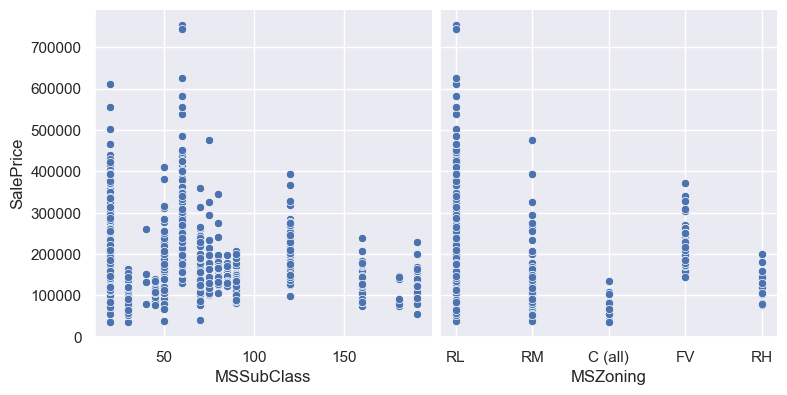

<Axes: >

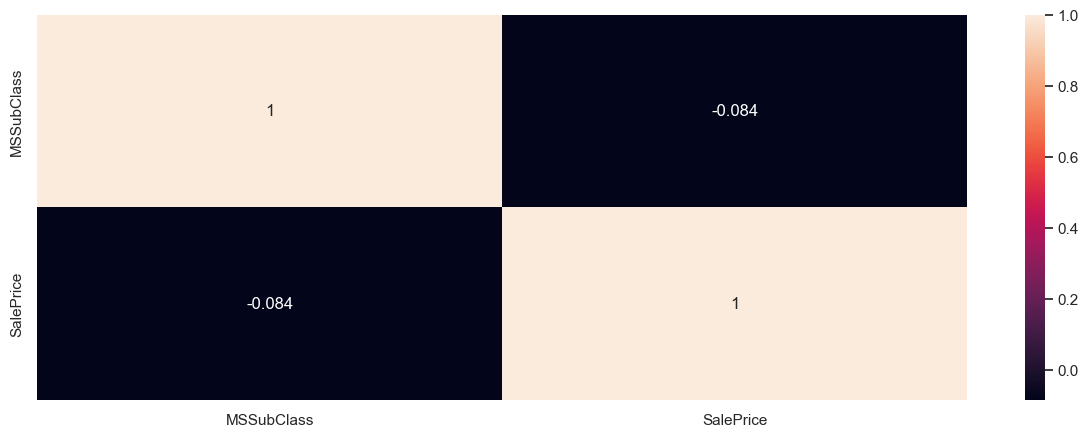

In [9]:
sns.pairplot(df_house, x_vars=['MSSubClass', 'MSZoning'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()
df_house1 = df_house[['MSSubClass', 'MSZoning','SalePrice']].copy()
sns.heatmap(df_house1.corr(), annot = True)

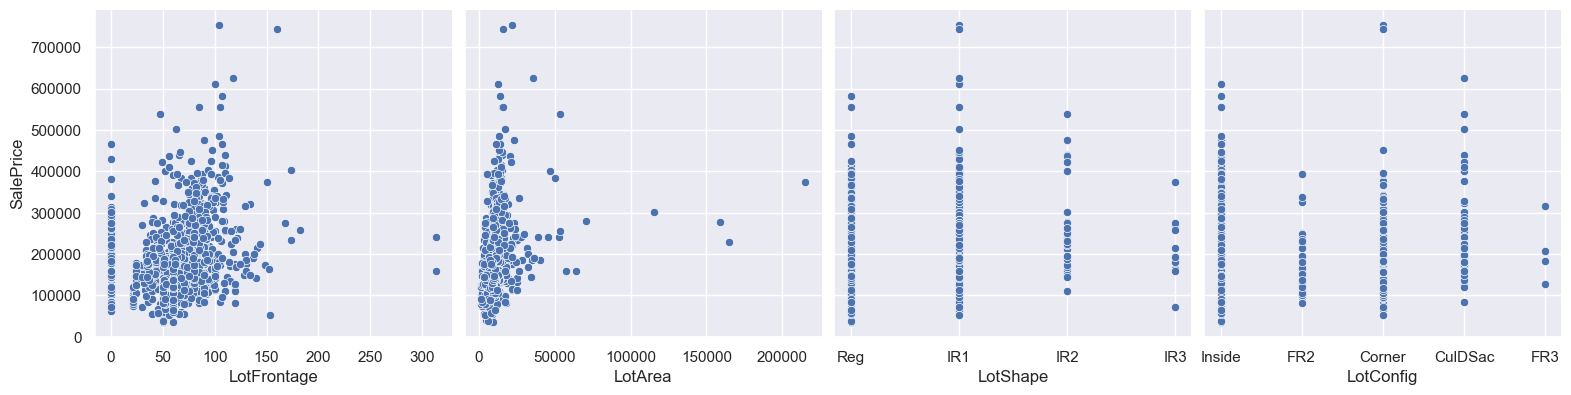

<Axes: >

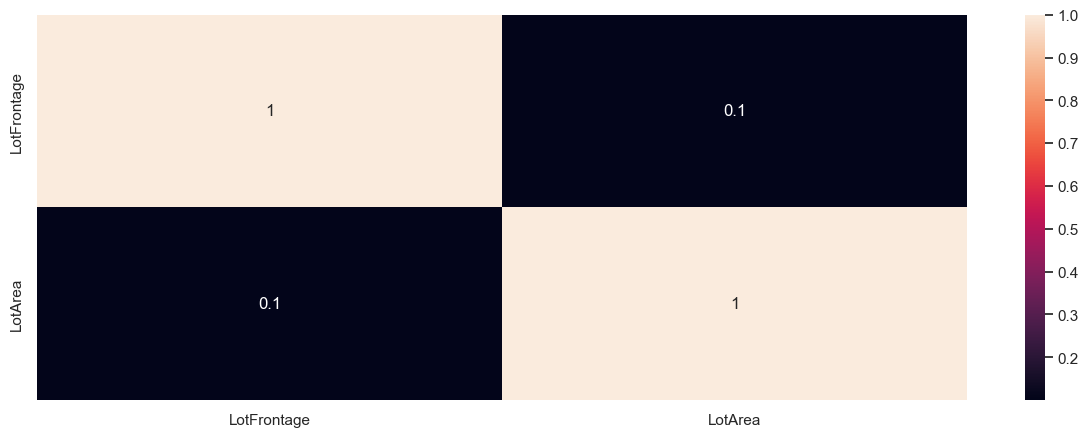

In [10]:
sns.pairplot(df_house, x_vars=['LotFrontage', 'LotArea', 'LotShape', 'LotConfig'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()
df_house2 = df_house[['LotFrontage', 'LotArea', 'LotShape', 'LotConfig']].copy()
sns.heatmap(df_house2.corr(), annot = True)

In [ ]:
sns.pairplot(df_house, x_vars=['BldgType', 'HouseStyle', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional' ], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()
df_house4 = df_house[['BldgType', 'HouseStyle', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional']].copy()
sns.heatmap(df_house4.corr(), annot = True)


In [ ]:
sns.pairplot(df_house, x_vars=['Condition1', 'Condition2', 'OverallQual', 'OverallCond'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()
df_house5 = df_house[['Condition1', 'Condition2', 'OverallQual', 'OverallCond']].copy()
sns.heatmap(df_house5.corr(), annot = True)


In [ ]:
sns.pairplot(df_house, x_vars=[ 'YearBuilt', 'YearRemodAdd'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()
df_house6 = df_house[['YearBuilt', 'YearRemodAdd']].copy()
sns.heatmap(df_house6.corr(), annot = True)


In [ ]:
sns.pairplot(df_house, x_vars=['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'MasVnrType', 'MasVnrArea'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
sns.pairplot(df_house, x_vars=['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()
df_house8 = df_house[['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].copy()
sns.heatmap(df_house8.corr(), annot = True)


In [ ]:
sns.pairplot(df_house, x_vars=['Heating', 'HeatingQC', 'CentralAir', 'Electrical'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
sns.pairplot(df_house, x_vars=['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()
df_house10 = df_house[['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']].copy()
sns.heatmap(df_house10.corr(), annot = True)

In [ ]:
sns.pairplot(df_house, x_vars=['Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()
df_house11 = df_house[['Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']].copy()
sns.heatmap(df_house11.corr(), annot = True)

In [ ]:
sns.pairplot(df_house, x_vars=['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()
df_house12 = df_house[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence']].copy()
sns.heatmap(df_house12.corr(), annot = True)

In [ ]:
sns.pairplot(df_house, x_vars=['MiscFeature', 'MiscVal'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()


In [ ]:
sns.pairplot(df_house, x_vars=['MoSold', 'YrSold'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()
df_house14 = df_house[['MoSold', 'YrSold']].copy()
sns.heatmap(df_house14.corr(), annot = True)


In [ ]:
sns.pairplot(df_house, x_vars=['SaleType', 'SaleCondition'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()


Introducing dummy variables for all categorical variables

In [12]:
MSZoning = pd.get_dummies(df_house['MSZoning'], drop_first = True)
df_house = pd.concat([df_house, MSZoning], axis = 1)
LotShape = pd.get_dummies(df_house['LotShape'], drop_first = True)
df_house = pd.concat([df_house, LotShape], axis = 1)
LotConfig = pd.get_dummies(df_house['LotConfig'], drop_first = True)
df_house = pd.concat([df_house, LotConfig], axis = 1)
LandContour = pd.get_dummies(df_house['LandContour'], drop_first = True)
df_house = pd.concat([df_house, LandContour], axis = 1)
LandSlope = pd.get_dummies(df_house['LandSlope'], drop_first = True)
df_house = pd.concat([df_house, LandSlope], axis = 1)
Street = pd.get_dummies(df_house['Street'], drop_first = True)
df_house = pd.concat([df_house, Street], axis = 1)
Alley = pd.get_dummies(df_house['Alley'], drop_first = True)
df_house = pd.concat([df_house, Alley], axis = 1)
Neighborhood = pd.get_dummies(df_house['Neighborhood'], drop_first = True)
df_house = pd.concat([df_house, Neighborhood], axis = 1)
Utilities = pd.get_dummies(df_house['Utilities'], drop_first = True)
df_house = pd.concat([df_house, Utilities], axis = 1)
BldgType = pd.get_dummies(df_house['BldgType'], drop_first = True)
df_house = pd.concat([df_house, BldgType], axis = 1)
HouseStyle = pd.get_dummies(df_house['HouseStyle'], drop_first = True)
df_house = pd.concat([df_house, HouseStyle], axis = 1)
FullBath = pd.get_dummies(df_house['FullBath'], drop_first = True)
df_house = pd.concat([df_house, FullBath], axis = 1)
HalfBath = pd.get_dummies(df_house['HalfBath'], drop_first = True)
df_house = pd.concat([df_house, HalfBath], axis = 1)
BedroomAbvGr = pd.get_dummies(df_house['BedroomAbvGr'], drop_first = True)
df_house = pd.concat([df_house, BedroomAbvGr], axis = 1)
KitchenAbvGr = pd.get_dummies(df_house['KitchenAbvGr'], drop_first = True)
df_house = pd.concat([df_house, KitchenAbvGr], axis = 1)
KitchenQual = pd.get_dummies(df_house['KitchenQual'], drop_first = True)
df_house = pd.concat([df_house, KitchenQual], axis = 1)
TotRmsAbvGrd = pd.get_dummies(df_house['TotRmsAbvGrd'], drop_first = True)
df_house = pd.concat([df_house, TotRmsAbvGrd], axis = 1)
Functional = pd.get_dummies(df_house['Functional'], drop_first = True)
df_house = pd.concat([df_house, Functional], axis = 1)
Condition1 = pd.get_dummies(df_house['Condition1'], drop_first = True)
df_house = pd.concat([df_house, Condition1], axis = 1)
Condition2 = pd.get_dummies(df_house['Condition2'], drop_first = True)
df_house = pd.concat([df_house, Condition2], axis = 1)
BldgType = pd.get_dummies(df_house['BldgType'], drop_first = True)
df_house = pd.concat([df_house, BldgType], axis = 1)
HouseStyle = pd.get_dummies(df_house['HouseStyle'], drop_first = True)
df_house = pd.concat([df_house, HouseStyle], axis = 1)
RoofStyle = pd.get_dummies(df_house['RoofStyle'], drop_first = True)
df_house = pd.concat([df_house, RoofStyle], axis = 1)
RoofMatl = pd.get_dummies(df_house['RoofMatl'], drop_first = True)
df_house = pd.concat([df_house, RoofMatl], axis = 1)
Exterior1st = pd.get_dummies(df_house['Exterior1st'], drop_first = True)
df_house = pd.concat([df_house, Exterior1st], axis = 1)
Exterior2nd = pd.get_dummies(df_house['Exterior2nd'], drop_first = True)
df_house = pd.concat([df_house, Exterior2nd], axis = 1)
ExterQual = pd.get_dummies(df_house['ExterQual'], drop_first = True)
df_house = pd.concat([df_house, ExterQual], axis = 1)
ExterCond = pd.get_dummies(df_house['ExterCond'], drop_first = True)
df_house = pd.concat([df_house, ExterCond], axis = 1)
MasVnrType = pd.get_dummies(df_house['MasVnrType'], drop_first = True)
df_house = pd.concat([df_house, MasVnrType], axis = 1)
Foundation = pd.get_dummies(df_house['Foundation'], drop_first = True)
df_house = pd.concat([df_house, Foundation], axis = 1)
BsmtQual = pd.get_dummies(df_house['BsmtQual'], drop_first = True)
df_house = pd.concat([df_house, BsmtQual], axis = 1)
BsmtCond = pd.get_dummies(df_house['BsmtCond'], drop_first = True)
df_house = pd.concat([df_house, BsmtCond], axis = 1)
BsmtExposure = pd.get_dummies(df_house['BsmtExposure'], drop_first = True)
df_house = pd.concat([df_house, BsmtExposure], axis = 1)
BsmtFinType1 = pd.get_dummies(df_house['BsmtFinType1'], drop_first = True)
df_house = pd.concat([df_house, BsmtFinType1], axis = 1)
BsmtFinType2 = pd.get_dummies(df_house['BsmtFinType2'], drop_first = True)
df_house = pd.concat([df_house, BsmtFinType2], axis = 1)
BsmtFullBath = pd.get_dummies(df_house['BsmtFullBath'], drop_first = True)
df_house = pd.concat([df_house, BsmtFullBath], axis = 1)
BsmtHalfBath = pd.get_dummies(df_house['BsmtHalfBath'], drop_first = True)
df_house = pd.concat([df_house, BsmtHalfBath], axis = 1)
Heating = pd.get_dummies(df_house['Heating'], drop_first = True)
df_house = pd.concat([df_house, Heating], axis = 1)
HeatingQC = pd.get_dummies(df_house['HeatingQC'], drop_first = True)
df_house = pd.concat([df_house, HeatingQC], axis = 1)
CentralAir = pd.get_dummies(df_house['CentralAir'], drop_first = True)
df_house = pd.concat([df_house, CentralAir], axis = 1)
Electrical = pd.get_dummies(df_house['Electrical'], drop_first = True)
df_house = pd.concat([df_house, Electrical], axis = 1)
Fireplaces = pd.get_dummies(df_house['Fireplaces'], drop_first = True)
df_house = pd.concat([df_house, Fireplaces], axis = 1)
FireplaceQu = pd.get_dummies(df_house['FireplaceQu'], drop_first = True)
df_house = pd.concat([df_house, FireplaceQu], axis = 1)
GarageType = pd.get_dummies(df_house['GarageType'], drop_first = True)
df_house = pd.concat([df_house, GarageType], axis = 1)
GarageFinish = pd.get_dummies(df_house['GarageFinish'], drop_first = True)
df_house = pd.concat([df_house, GarageFinish], axis = 1)
GarageCars = pd.get_dummies(df_house['GarageCars'], drop_first = True)
df_house = pd.concat([df_house, GarageCars], axis = 1)
GarageQual = pd.get_dummies(df_house['GarageQual'], drop_first = True)
df_house = pd.concat([df_house, GarageQual], axis = 1)
GarageCond = pd.get_dummies(df_house['GarageCond'], drop_first = True)
df_house = pd.concat([df_house, GarageCond], axis = 1)
PavedDrive = pd.get_dummies(df_house['PavedDrive'], drop_first = True)
df_house = pd.concat([df_house, PavedDrive], axis = 1)
PoolQC = pd.get_dummies(df_house['PoolQC'], drop_first = True)
df_house = pd.concat([df_house, PoolQC], axis = 1)
Fence = pd.get_dummies(df_house['Fence'], drop_first = True)
df_house = pd.concat([df_house, Fence], axis = 1)
MiscFeature = pd.get_dummies(df_house['MiscFeature'], drop_first = True)
df_house = pd.concat([df_house, MiscFeature], axis = 1)
SaleType = pd.get_dummies(df_house['SaleType'], drop_first = True)
df_house = pd.concat([df_house, SaleType], axis = 1)
SaleCondition = pd.get_dummies(df_house['SaleCondition'], drop_first = True)
df_house = pd.concat([df_house, SaleCondition], axis = 1)

Drop the original categorical variables

In [13]:
df_house = df_house.drop(['MSZoning', 'LotShape', 'LotConfig', 'LandContour', 'LandSlope', 'Street', 'Alley', 'Neighborhood', 
                         'Utilities', 'BldgType', 'HouseStyle', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                         'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Condition1', 'Condition2', 'RoofStyle',
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'MasVnrType', 'Foundation',
                         'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath',
                         'BsmtHalfBath', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Fireplaces', 'FireplaceQu',
                         'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
                         'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], axis=1)

In [ ]:
df_house.shape

Starting Linear Regression

In [14]:
house_mlr = df_house.copy()

In [15]:
df_train, df_test = train_test_split(house_mlr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
# Scale the dataset
scaler = MinMaxScaler()
num_vars = ['LotFrontage', 'LotArea',
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
            'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
            'MiscVal', 'MoSold', 'YrSold']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
# Split the independent variable and the dependent variables
y_train = df_train.pop('SalePrice')
X_train = df_train

In [17]:
# Using SciKit Learn for MLR
X_train.columns = X_train.columns.astype(str)
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [18]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     63.32
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:55:52   Log-Likelihood:                -11348.
No. Observations:                1021   AIC:                         2.324e+04
Df Residuals:                     751   BIC:                         2.457e+04
Df Model:                         269                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.732e+05   3.99e+04     -6.840

In [19]:
# Scale the dataset
num_vars = ['LotFrontage', 'LotArea',
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
            'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
            'MiscVal', 'MoSold', 'YrSold']
df_test[num_vars] = scaler.transform(df_test[num_vars])
# Split the independent variable and the dependent variables
y_test = df_test.pop('SalePrice')
X_test = df_test


In [20]:
# Add constant for statsmodel
X_test = sm.add_constant(X_test)


In [21]:
# Make predictions for the test set
y_test_pred = lm.predict(X_test)

Model Evaluation shows that the LR is not right. Polynomial Regression is necessary

In [22]:
# Evaluate the model
r2_score(y_true = y_test, y_pred = y_test_pred)

0.46391905717457504

In [23]:
rss = np.sum(np.square(y_test-y_test_pred))
print(rss)

mse = mean_squared_error(y_test, y_test_pred)
print(mse)

rmse = mse**0.5
print(rmse)

1511058070824.0388
3449904271.28776
58735.88571978599


Applying Polynomial Regression along with Ridge regularization

In [24]:
X = X_train

In [25]:
poly = PolynomialFeatures(3)
y = poly.fit_transform(X)
print(y)

[[  1.   1. 211. ...   0.   0.   0.]
 [  1.   1. 319. ...   0.   0.   0.]
 [  1.   1. 240. ...   0.   0.   0.]
 ...
 [  1.   1.  54. ...   0.   0.   0.]
 [  1.   1. 351. ...   0.   0.   1.]
 [  1.   1.  80. ...   0.   0.   0.]]


In [ ]:
degree=3
polyreg = PolynomialFeatures(degree)
X_poly = polyreg.fit_transform(X) 
linreg = LinearRegression()
linreg.fit(X_poly, y)

In [ ]:
# Plotting the polynomial regression(degree-5) and simple linear regression
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1) 
plt.figure()
plt.scatter(X,y) 
plt.plot(X_seq,linreg.predict(polyreg.fit_transform(X_seq)),color="black") 
plt.plot(X_seq,reg.predict(X_seq),color="red") 
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [ ]:
y_pred = linreg.predict(polyreg.fit_transform(X))
print(r2_score(y, y_pred))

In [ ]:
# Metrics to assess model performance
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
rmse = mse**0.5
# Root Mean Squared Error
print(rmse)